In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [36]:
df=pd.read_csv(r"D:\data analysis\Myntra Fasion Clothing.csv")

In [37]:
df.shape

(526564, 13)

In [38]:
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [39]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
categorical_cols = []
numerical_cols = []

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column dtype is object (indicating categorical data)
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Print the lists of categorical and numerical column names
print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['URL', 'BrandName', 'Category', 'Individual_category', 'category_by_Gender', 'Description', 'DiscountOffer', 'SizeOption']

Numerical Columns:
['Product_id', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews']


## 1. Brand Performance Analysis:

#### 1) Top 10 Brands

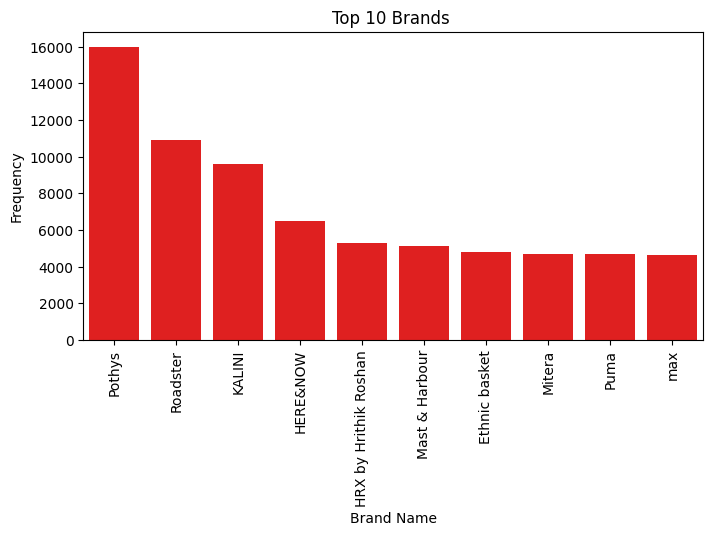

In [42]:
top_brands = df['BrandName'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_brands.index, y=top_brands.values,color='red')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')
plt.title('Top 10 Brands ')
plt.xticks(rotation=90)
plt.savefig('Top 10 Brands.jpg')
plt.show()

#### 2) Top ten brands based on customers reviews

In [43]:
top_ten_Reviews=df['Reviews'].value_counts().head(10)

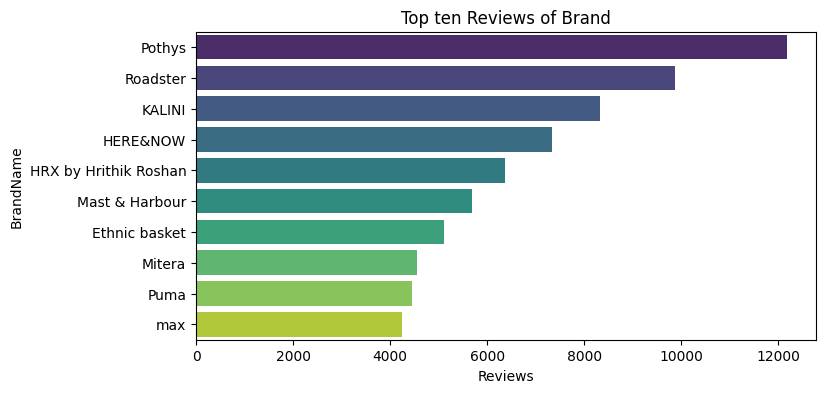

In [44]:
plt.figure(figsize=(8, 4))
sns.barplot(x =top_ten_Reviews.values,y=top_brands.index,palette='viridis')
plt.xlabel('Reviews')
plt.ylabel('BrandName')
plt.title('Top ten Reviews of Brand')
plt.savefig('Top 10 brands based on customers reviews.jpg')
plt.show()

#### 3) Top ten brands based on customers ratings

In [47]:
top_ten_Ratings=df['Ratings'].value_counts().head(10)

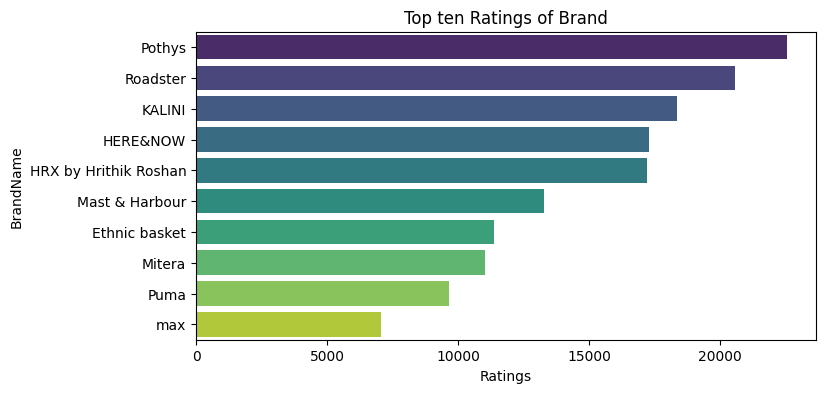

In [48]:
plt.figure(figsize=(8, 4))
sns.barplot(x =top_ten_Ratings.values, y=top_brands.index,palette='viridis')
plt.xlabel('Ratings')
plt.ylabel('BrandName')
plt.title('Top ten Ratings of Brand')
plt.savefig('top 10 brands based on customers ratings.jpg')
plt.show()

### 4)top 10 brands based on OriginalPrice

In [49]:
original_price=df['OriginalPrice (in Rs)'].value_counts().head(10)
brand_name=df['BrandName'].value_counts().head(10)

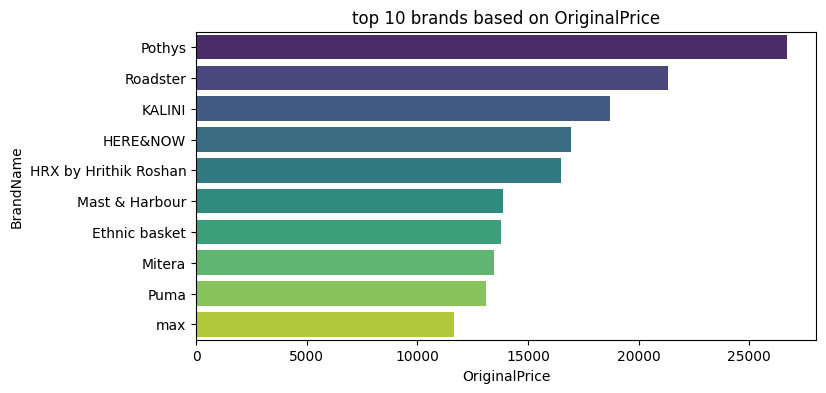

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(x = original_price.values, y = brand_name.index,palette='viridis')
plt.xlabel('OriginalPrice')
plt.title('top 10 brands based on OriginalPrice')
plt.savefig('top 10 brands based on OriginalPrice.jpg')
plt.show()

### 5)top 10 brands based on Discount_price

In [52]:
dis_price=df['DiscountPrice (in Rs)'].value_counts().head(10)

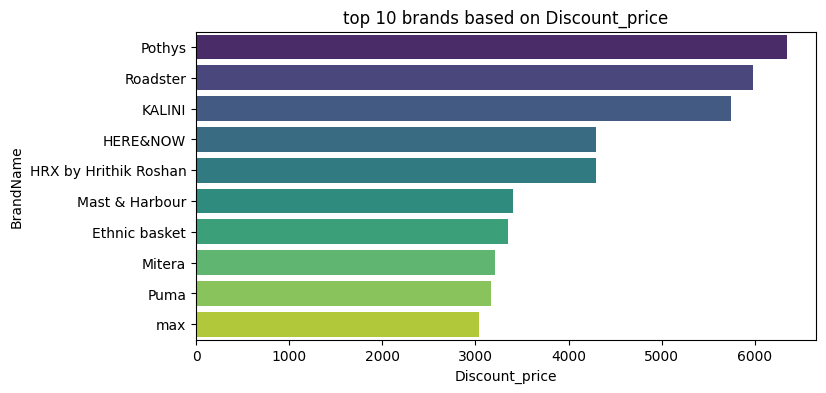

In [53]:
plt.figure(figsize=(8, 4))
sns.barplot(x = dis_price.values, y = brand_name.index,palette='viridis')
plt.xlabel('Discount_price')
plt.title('top 10 brands based on Discount_price')
plt.savefig('top 10 brands based on Discount_price.jpg')
plt.show()

#### 6) Top Category

In [54]:
top_ten_Category=df['Category'].value_counts().head(10)

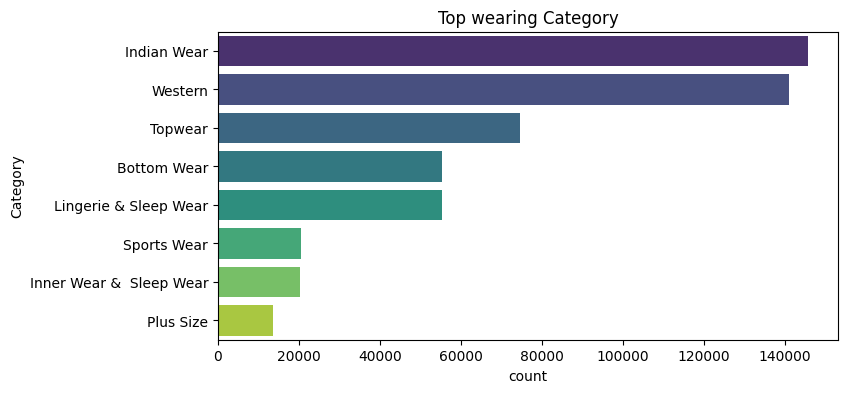

In [55]:
plt.figure(figsize=(8, 4))
sns.barplot(x = top_ten_Category.values, y = top_ten_Category.index,palette='viridis')
plt.xlabel('count')
plt.title('Top wearing Category')
plt.savefig('Top Wearing Category.jpg')
plt.show()

##### 7) Top 10 brands in Indian Wear Section

In [56]:
IndianWear = df[df['Category'] == 'Indian Wear']
sizes = IndianWear['BrandName'].value_counts().head(10).values
labels = IndianWear['BrandName'].value_counts().head(10).index

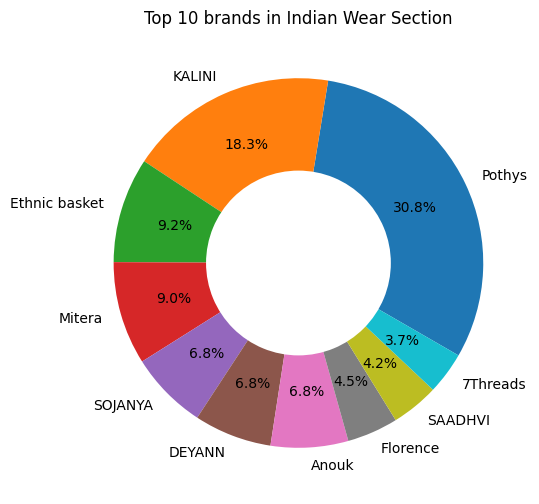

In [57]:
plt.figure(figsize=(12,6))
plt.pie(sizes,labels=labels,autopct="%0.1f%%",startangle=330,pctdistance=0.7)
plt.pie([1],radius=0.5,colors='white')
plt.title('Top 10 brands in Indian Wear Section')
plt.savefig('Top 10 brands in Indian Wear Section.jpg')
plt.show()

##### 8) Top 10 brands in Western Wear Section

In [58]:
WesternWear = df[df['Category'] == 'Western']
sizes = IndianWear['BrandName'].value_counts().head(10).values
labels = IndianWear['BrandName'].value_counts().head(10).index

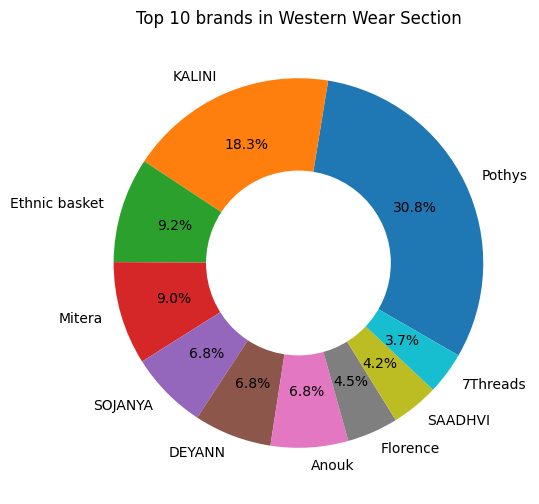

In [59]:
plt.figure(figsize=(12,6))
plt.pie(sizes,labels=labels,autopct="%0.1f%%",startangle=330,pctdistance=0.7)
plt.pie([1],radius=0.5,colors='white')
plt.title('Top 10 brands in Western Wear Section')
plt.savefig('Top 10 brands in Western Wear Section')
plt.show()

#### 9) Top wearing top_ten_Individual_clothes

In [60]:
tail_ten_Individual_clothes=df['Individual_category'].value_counts().tail(10)
tail_ten_Individual_clothes

Individual_category
outdoor-masks     8
handbags          7
boots             4
harem-pants       2
jewellery-set     2
heels             2
lungi             1
hair-accessory    1
bracelet          1
flip-flops        1
Name: count, dtype: int64

In [61]:
top_ten_Individual_clothes=df['Individual_category'].value_counts().head(10)

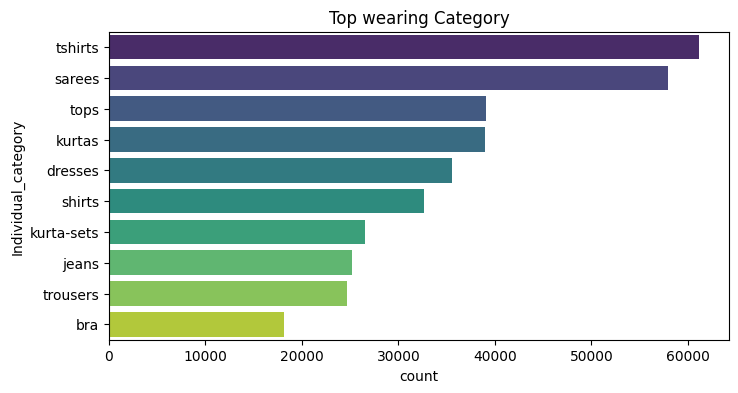

In [62]:
plt.figure(figsize=(8, 4))
sns.barplot(x = top_ten_Individual_clothes.values, y = top_ten_Individual_clothes.index,palette='viridis')
plt.xlabel('count')
plt.title('Top wearing Category')
plt.savefig('Top wearing Category.jpg')
plt.show()

#### 10) Online shoping category_by_Gender

In [63]:
category_by_Gender=df['category_by_Gender'].value_counts()
category_by_Gender

category_by_Gender
Women    339185
Men      187379
Name: count, dtype: int64

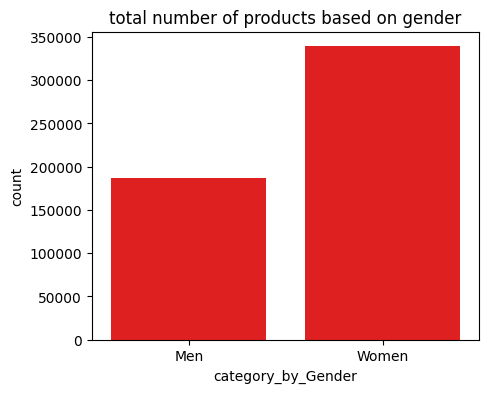

In [64]:
plt.figure(figsize=(5,4))
sns.countplot(x='category_by_Gender',data=df,color=r'red')
plt.title('total number of products based on gender')
plt.savefig('total number of products based on gender.jpg')
plt.show()

#### 11) Which brands are purchased by each gender category?

In [65]:
Brand_Name=df['BrandName'].value_counts().index[:10]
men_category=df[df['category_by_Gender'] == 'Men']
women_category=df[df['category_by_Gender'] == 'Women']

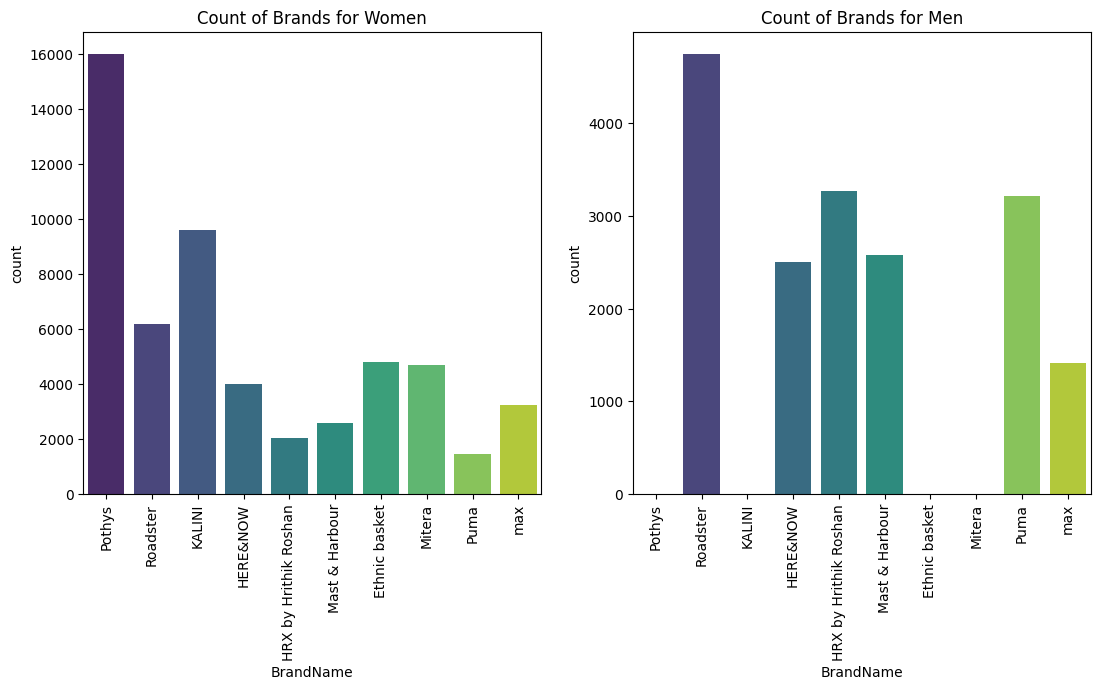

In [66]:
fig, axs = plt.subplots(1,2, figsize=(13, 6))

sns.countplot(data=women_category, x='BrandName', ax=axs[0], order=Brand_Name,palette='viridis')
axs[0].set_title("Count of Brands for Women")
axs[0].tick_params(axis='x', rotation=90) 


sns.countplot(data=men_category, x='BrandName', ax=axs[1], order=Brand_Name,palette='viridis')
axs[1].set_title("Count of Brands for Men")
axs[1].tick_params(axis='x', rotation=90) 

plt.savefig('top 10 brands based on Gender')
plt.show()


#### 12) Which top Brands purches by which one

In [67]:
top_brands_women = df[df['category_by_Gender'] == 'Women']['BrandName'].value_counts().index[:10]
top_brands_men = df[df['category_by_Gender'] == 'Men']['BrandName'].value_counts().index[:10]

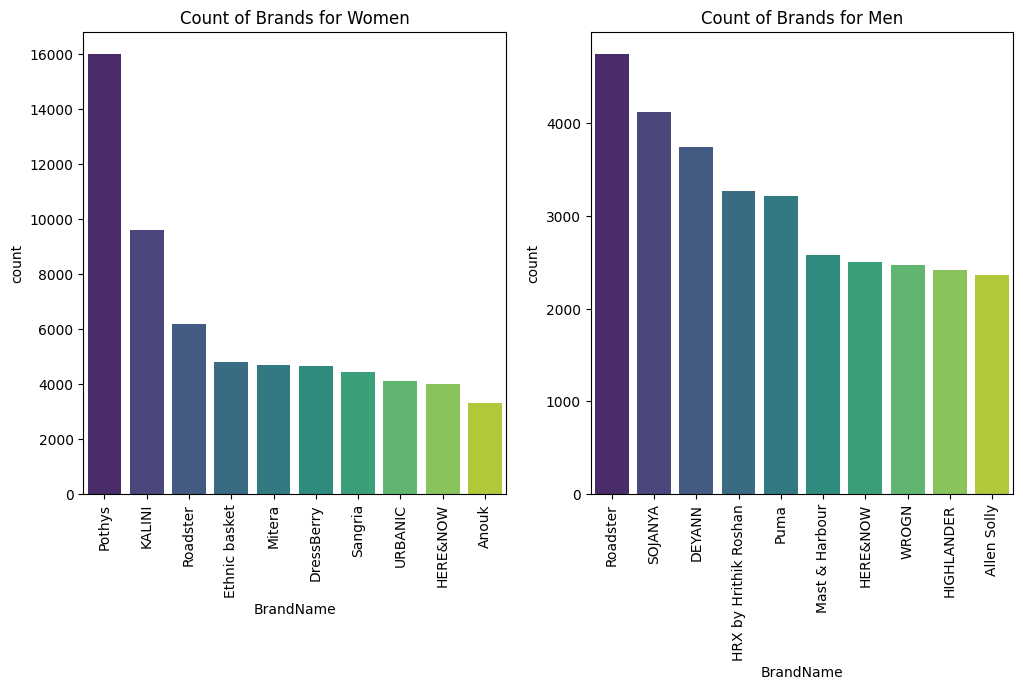

In [68]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

sns.countplot(data=df[df['category_by_Gender'] == 'Women'], x='BrandName', ax=axs[0], order=top_brands_women,palette='viridis')
axs[0].set_title("Count of Brands for Women")
axs[0].tick_params(axis='x', rotation=90) 


sns.countplot(data=df[df['category_by_Gender'] == 'Men'], x='BrandName', ax=axs[1], order=top_brands_men,palette='viridis')
axs[1].set_title("Count of Brands for Men")
axs[1].tick_params(axis='x', rotation=90) 

plt.savefig('Top Brands purches by category_by_Gender')
plt.show()

#### 13) Ware top_Individual_category 

In [69]:
top_Individual_category=df['Individual_category'].value_counts()
top_Individual_category

Individual_category
tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
heels                 2
lungi                 1
hair-accessory        1
bracelet              1
flip-flops            1
Name: count, Length: 92, dtype: int64

In [70]:
top_Individual_category_women = df[df['category_by_Gender'] == 'Women']['Individual_category'].value_counts().index[:15]
top_Individual_category_men = df[df['category_by_Gender'] == 'Men']['Individual_category'].value_counts().index[:15]

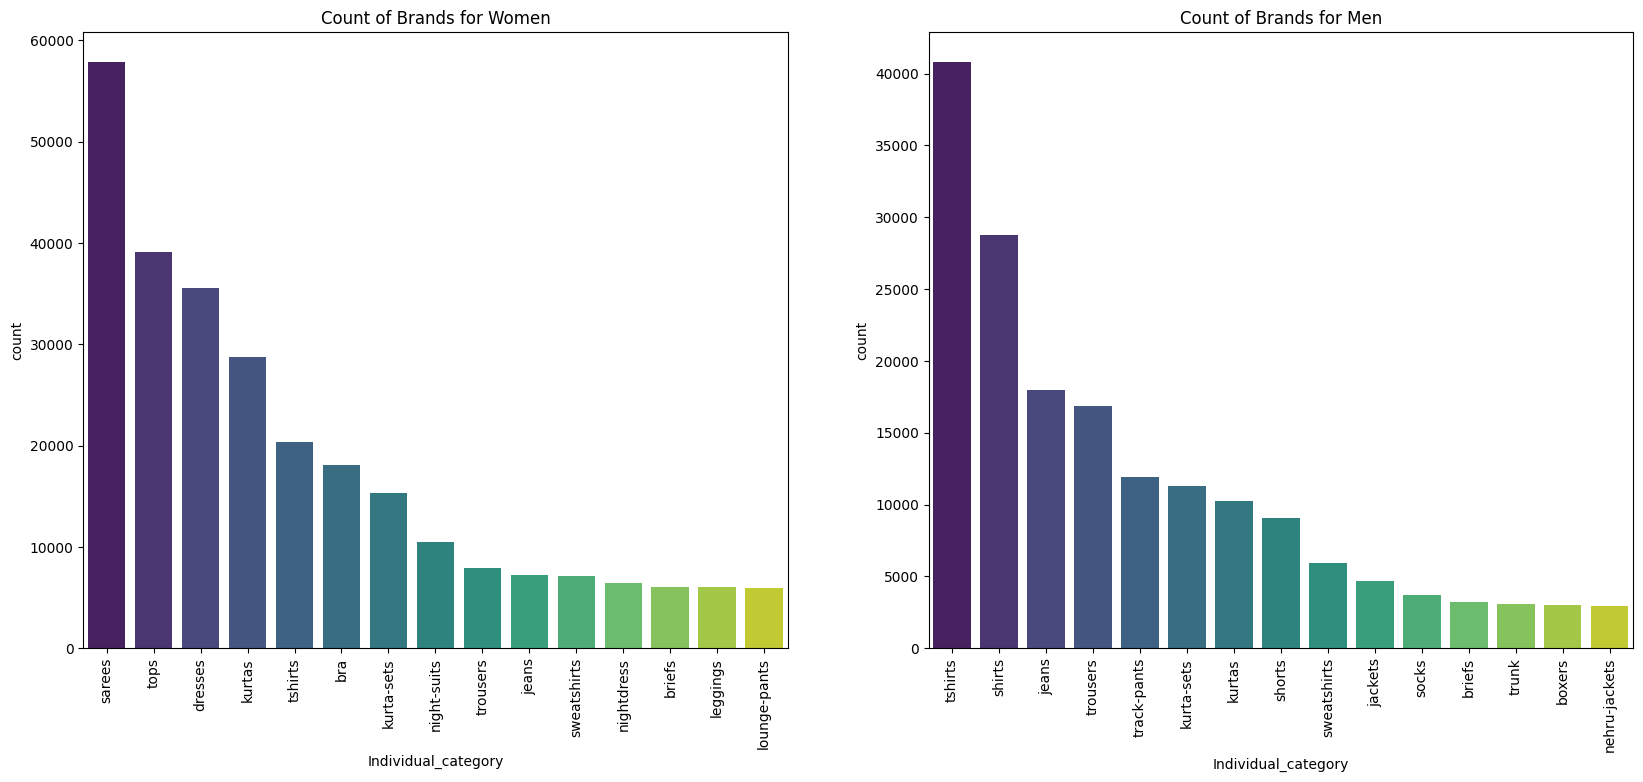

In [71]:
fig, axs = plt.subplots(1,2, figsize=(20, 8))

sns.countplot(data=women_category, x='Individual_category', ax=axs[0], order=top_Individual_category_women,palette='viridis')
axs[0].set_title("Count of Brands for Women")
axs[0].tick_params(axis='x', rotation=90) 


sns.countplot(data=men_category, x='Individual_category', ax=axs[1], order=top_Individual_category_men,palette='viridis')
axs[1].set_title("Count of Brands for Men")
axs[1].tick_params(axis='x', rotation=90) 

plt.savefig('top_Individual_category.jpg')
plt.show()

#### 14) Gender preference for different categories

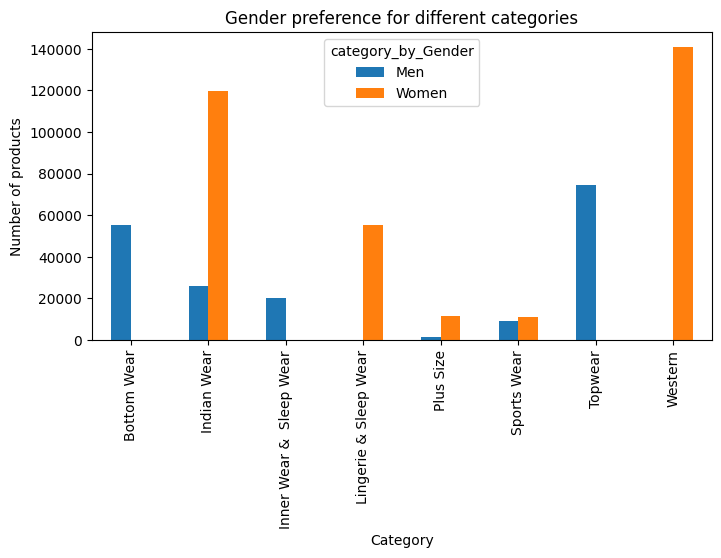

In [72]:
gender_count = df.groupby(['Category', 'category_by_Gender'])['Product_id'].count().reset_index()
gender_count = gender_count.pivot(index='Category', columns='category_by_Gender', values='Product_id')

fig, ax = plt.subplots(figsize=(8, 4))
gender_count.plot(kind='bar', ax=ax)
ax.set_title('Gender preference for different categories')
ax.set_xlabel('Category')
ax.set_ylabel('Number of products')
plt.xticks(rotation=90)
plt.savefig('Gender preference for different categories.jpg')
plt.show()

#### 15) popular size options among men and women

In [73]:
men_sizes=df[df['category_by_Gender']=='Men']['SizeOption']
women_sizes=df[df['category_by_Gender']=='Women']['SizeOption']

In [74]:
popular_women_sizes=women_sizes.value_counts().head(7)
popular_men_sizes=men_sizes.value_counts().head(7)

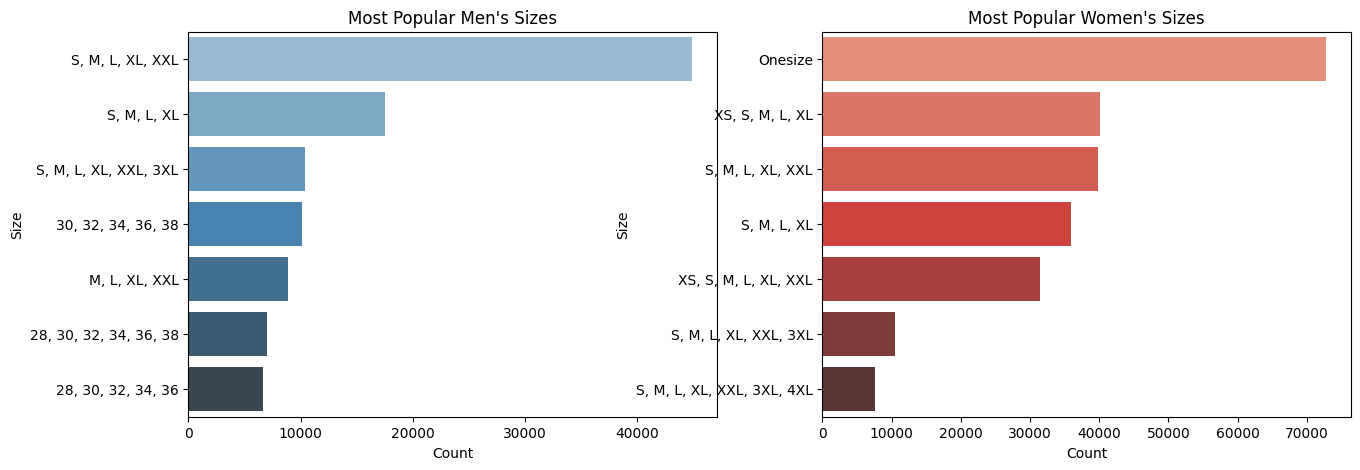

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#Mens
sns.barplot(x=popular_men_sizes.values, y=popular_men_sizes.index, ax=axs[0], palette="Blues_d")
axs[0].set_title("Most Popular Men's Sizes")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Size")

#Womens
sns.barplot(x=popular_women_sizes.values, y=popular_women_sizes.index, ax=axs[1], palette="Reds_d")
axs[1].set_title("Most Popular Women's Sizes")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("Size")

plt.savefig('popular size options among men and women.jpg')
plt.show()

#### 11) Mean DiscountOffer vs. Original Price  correlation

In [76]:
aggregated_data = df.groupby('OriginalPrice (in Rs)')['DiscountOffer'].mean().reset_index()
aggregated_data = aggregated_data.sort_values(by='OriginalPrice (in Rs)')

TypeError: agg function failed [how->mean,dtype->object]

In [79]:
sns.scatterplot(x='OriginalPrice (in Rs)', y='DiscountOffer', data=aggregated_data, marker='o', color='b')

plt.title('Mean DiscountOffer vs. Original Price')
plt.xlabel('Original Price (in Rs)')
plt.ylabel('Mean DiscountOffer')
plt.grid(True)

plt.tight_layout()

plt.savefig('Mean DiscountOffer vs. Original Price  correlation.jpg')
plt.show()

NameError: name 'aggregated_data' is not defined

In [ ]:
aggregated_data = df.groupby('DiscountOffer')['OriginalPrice (in Rs)'].mean().reset_index()
aggregated_data = aggregated_data.sort_values(by='DiscountOffer')
aggregated_data

In [ ]:
sns.scatterplot(x='DiscountOffer',y='OriginalPrice (in Rs)', data=aggregated_data, marker='o', color='b')

plt.title('Mean  Original Price   vs.DiscountOffer')
plt.xlabel('DiscountOffer')
plt.ylabel('Mean  Original Price ')
plt.grid(True)
plt.show()

In [ ]:
df.columns

In [ ]:
df['Discount_price(in Rs)'].sum()

In [ ]:
df['OriginalPrice (in Rs)'].sum()

In [ ]:
df.groupby('DiscountOffer')['OriginalPrice (in Rs)']['category_by_Gender'].mean().reset_index()

In [ ]:
grouped_df = df.groupby(['DiscountOffer', 'category_by_Gender'])['OriginalPrice (in Rs)'].mean().reset_index()

In [ ]:
grouped_df

In [ ]:
sns.scatterplot(x='DiscountOffer', y='OriginalPrice (in Rs)', hue='category_by_Gender', data=grouped_df)

In [ ]:
grouped_ = df.groupby(['DiscountOffer', 'category_by_Gender'])['Discount_price(in Rs)'].mean().reset_index()

In [ ]:
sns.scatterplot(x='DiscountOffer', y='Discount_price(in Rs)', hue='category_by_Gender', data=grouped_)